In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [42]:
df_train = pd.read_csv("C:/Users/FPTSHOP/OneDrive/Documents/SAV/RawData/mobileData/Train.csv", index_col= 0)
df_valid = pd.read_csv("C:/Users/FPTSHOP/OneDrive/Documents/SAV/RawData/mobileData/Dev.csv", index_col= 0)
df_test = pd.read_csv("C:/Users/FPTSHOP/OneDrive/Documents/SAV/RawData/mobileData/Test.csv", index_col= 0)



In [43]:
df_train.head()

,comment,n_star,date_time,label
index,,,,
0,Mới mua máy này Tại thegioididong thốt nốt cảm...,5,2 tuần trước,{CAMERA#Positive};{FEATURES#Positive};{BATTERY...
1,Pin kém còn lại miễn chê mua 8/3/2019 tình trạ...,5,14/09/2019,{BATTERY#Negative};{GENERAL#Positive};{OTHERS};
2,Sao lúc gọi điện thoại màn hình bị chấm nhỏ nh...,3,17/08/2020,{FEATURES#Negative};
3,"Mọi người cập nhật phần mềm lại , nó sẽ bớt tố...",3,29/02/2020,{FEATURES#Negative};{BATTERY#Neutral};{GENERAL...
4,"Mới mua Sài được 1 tháng thấy pin rất trâu, Sà...",5,4/6/2020,{BATTERY#Positive};{PERFORMANCE#Positive};{SER...


In [44]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7786 entries, 0 to 7785
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   comment    7786 non-null   object
 1   n_star     7786 non-null   int64 
 2   date_time  7786 non-null   object
 3   label      7786 non-null   object
dtypes: int64(1), object(3)
memory usage: 304.1+ KB


## **Lables**

In [45]:
# Regular expression pattern to match aspect names and labels
pattern = r'{([^#]*)#([^}]*)'

# Initialize dictionary to store counts
aspect_label_counts = {}

# Extract aspect names and labels
for sentence in df_train.label:
    matches = re.findall(pattern, sentence)
    for aspect, label in matches:
        if aspect not in aspect_label_counts:
            aspect_label_counts[aspect] = {'Positive': 0, 'Negative': 0,'Neutral': 0}
        aspect_label_counts[aspect][label] += 1

# Convert to DataFrame
df_check_label = pd.DataFrame(aspect_label_counts).T.reset_index()
df_check_label.columns = ['Aspect', 'Positive', 'Negative','Neutral']

In [46]:
df_check_label

,Aspect,Positive,Negative,Neutral
0,CAMERA,1231,627,288
1,FEATURES,785,1659,198
2,BATTERY,2027,1228,349
3,PRICE,609,316,1136
4,GENERAL,3627,949,290
5,SER&ACC,1401,487,107
6,PERFORMANCE,2253,1496,391
7,SCREEN,514,379,56
8,DESIGN,999,302,77
9,STORAGE,59,21,11


In [47]:
totals = df_check_label[['Positive', 'Negative', 'Neutral']].sum()

totals_row = pd.DataFrame([['Total', *totals]], columns=df_check_label.columns)

df_check_label = pd.concat([df_check_label, totals_row], ignore_index=True)

print(df_check_label)

         Aspect  Positive  Negative  Neutral
0        CAMERA      1231       627      288
1      FEATURES       785      1659      198
2       BATTERY      2027      1228      349
3         PRICE       609       316     1136
4       GENERAL      3627       949      290
5       SER&ACC      1401       487      107
6   PERFORMANCE      2253      1496      391
7        SCREEN       514       379       56
8        DESIGN       999       302       77
9       STORAGE        59        21       11
10        Total     13505      7464     2903


In [48]:
df_check_label['Row_Total'] = df_check_label[['Positive', 'Negative', 'Neutral']].sum(axis=1)
df_check_label


,Aspect,Positive,Negative,Neutral,Row_Total
0,CAMERA,1231,627,288,2146
1,FEATURES,785,1659,198,2642
2,BATTERY,2027,1228,349,3604
3,PRICE,609,316,1136,2061
4,GENERAL,3627,949,290,4866
5,SER&ACC,1401,487,107,1995
6,PERFORMANCE,2253,1496,391,4140
7,SCREEN,514,379,56,949
8,DESIGN,999,302,77,1378
9,STORAGE,59,21,11,91


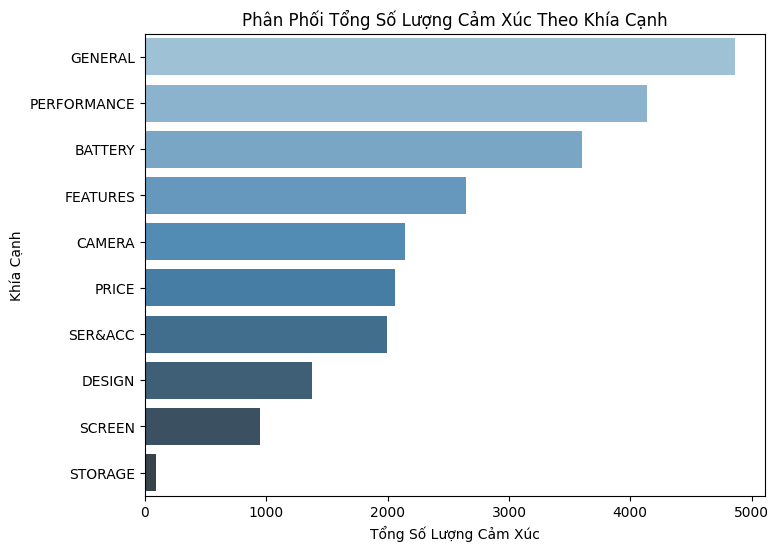

In [49]:
df_plot = df_check_label[:-1]

df_plot_sorted = df_plot.sort_values('Row_Total', ascending=False)

plt.figure(figsize=(8, 6))  
sns.barplot(x='Row_Total', y='Aspect', data=df_plot_sorted, palette='Blues_d')

plt.title('Phân Phối Tổng Số Lượng Cảm Xúc Theo Khía Cạnh')
plt.xlabel('Tổng Số Lượng Cảm Xúc')
plt.ylabel('Khía Cạnh')

plt.show()


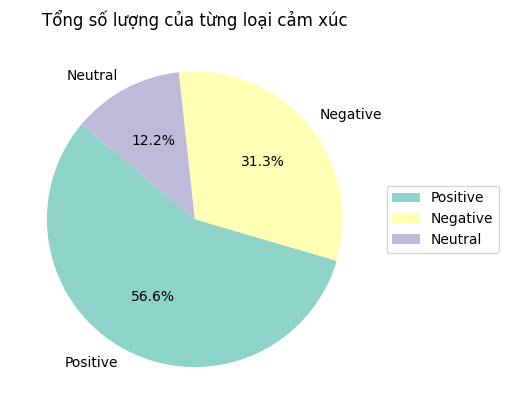

In [50]:
totals = df_check_label.iloc[-1, 1:-1]
colors = sns.color_palette('Set3')
plt.pie(totals.values, labels=totals.index, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Tổng số lượng của từng loại cảm xúc')

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()


### **Labels Review**

#### **Khía cạnh**

+ Có tổng cộng 10 khía cạnh được trích xuất cuối cùng, ngoại trừ OTHERS. Điều này xảy ra vì OTHERS không cung cấp bất cứ thông tin nào về phân loại tình cảm (Sentiment Classification)

+ Khía cạnh có tần suất xuất hiện nhiều nhất là GENERAL: 4866.

+ Khía cạnh có tần suất xuất hiện ít nhất là STORAGE: 91.

#### **Cảm xúc**

+ Có tổng cộng 3 loại cảm xúc: Tích cực, tiêu cực và bình thường.

+ Cảm xúc tích cực chiếm hơn một nửa dữ liệu => imbalanced data

**=>Trong trường hợp mô hình hoạt động không tốt với những khía cạnh và nhãn có tần suất xuất hiện ít, cần thực hiện data augmentation**



## **EDA TEXT**

In [51]:
import regex as re
import string
import emoji
import demoji
import underthesea
from nltk import flatten

# Remove HTML code
def remove_HTML(text):
    return re.sub(r'<[^>]*>', '', text)

# Standardize unicode
def convert_unicode(text):
    char1252 = 'à|á|ả|ã|ạ|ầ|ấ|ẩ|ẫ|ậ|ằ|ắ|ẳ|ẵ|ặ|è|é|ẻ|ẽ|ẹ|ề|ế|ể|ễ|ệ|ì|í|ỉ|ĩ|ị|ò|ó|ỏ|õ|ọ|ồ|ố|ổ|ỗ|ộ|ờ|ớ|ở|ỡ|ợ|ù|ú|ủ|ũ|ụ|ừ|ứ|ử|ữ|ự|ỳ|ý|ỷ|ỹ|ỵ|À|Á|Ả|Ã|Ạ|Ầ|Ấ|Ẩ|Ẫ|Ậ|Ằ|Ắ|Ẳ|Ẵ|Ặ|È|É|Ẻ|Ẽ|Ẹ|Ề|Ế|Ể|Ễ|Ệ|Ì|Í|Ỉ|Ĩ|Ị|Ò|Ó|Ỏ|Õ|Ọ|Ồ|Ố|Ổ|Ỗ|Ộ|Ờ|Ớ|Ở|Ỡ|Ợ|Ù|Ú|Ủ|Ũ|Ụ|Ừ|Ứ|Ử|Ữ|Ự|Ỳ|Ý|Ỷ|Ỹ|Ỵ'
    charutf8 = 'à|á|ả|ã|ạ|ầ|ấ|ẩ|ẫ|ậ|ằ|ắ|ẳ|ẵ|ặ|è|é|ẻ|ẽ|ẹ|ề|ế|ể|ễ|ệ|ì|í|ỉ|ĩ|ị|ò|ó|ỏ|õ|ọ|ồ|ố|ổ|ỗ|ộ|ờ|ớ|ở|ỡ|ợ|ù|ú|ủ|ũ|ụ|ừ|ứ|ử|ữ|ự|ỳ|ý|ỷ|ỹ|ỵ|À|Á|Ả|Ã|Ạ|Ầ|Ấ|Ẩ|Ẫ|Ậ|Ằ|Ắ|Ẳ|Ẵ|Ặ|È|É|Ẻ|Ẽ|Ẹ|Ề|Ế|Ể|Ễ|Ệ|Ì|Í|Ỉ|Ĩ|Ị|Ò|Ó|Ỏ|Õ|Ọ|Ồ|Ố|Ổ|Ỗ|Ộ|Ờ|Ớ|Ở|Ỡ|Ợ|Ù|Ú|Ủ|Ũ|Ụ|Ừ|Ứ|Ử|Ữ|Ự|Ỳ|Ý|Ỷ|Ỹ|Ỵ'
    char1252 = char1252.split('|')
    charutf8 = charutf8.split('|')
    
    dic = {}
    for i in range(len(char1252)): dic[char1252[i]] = charutf8[i]
    return re.sub(
        r'à|á|ả|ã|ạ|ầ|ấ|ẩ|ẫ|ậ|ằ|ắ|ẳ|ẵ|ặ|è|é|ẻ|ẽ|ẹ|ề|ế|ể|ễ|ệ|ì|í|ỉ|ĩ|ị|ò|ó|ỏ|õ|ọ|ồ|ố|ổ|ỗ|ộ|ờ|ớ|ở|ỡ|ợ|ù|ú|ủ|ũ|ụ|ừ|ứ|ử|ữ|ự|ỳ|ý|ỷ|ỹ|ỵ|À|Á|Ả|Ã|Ạ|Ầ|Ấ|Ẩ|Ẫ|Ậ|Ằ|Ắ|Ẳ|Ẵ|Ặ|È|É|Ẻ|Ẽ|Ẹ|Ề|Ế|Ể|Ễ|Ệ|Ì|Í|Ỉ|Ĩ|Ị|Ò|Ó|Ỏ|Õ|Ọ|Ồ|Ố|Ổ|Ỗ|Ộ|Ờ|Ớ|Ở|Ỡ|Ợ|Ù|Ú|Ủ|Ũ|Ụ|Ừ|Ứ|Ử|Ữ|Ự|Ỳ|Ý|Ỷ|Ỹ|Ỵ',
        lambda x: dic[x.group()], text
    )


# Standardize accent typing
vowels_to_ids = {}
vowels_table = [
    ['a', 'à', 'á', 'ả', 'ã', 'ạ', 'a' ],
    ['ă', 'ằ', 'ắ', 'ẳ', 'ẵ', 'ặ', 'aw'],
    ['â', 'ầ', 'ấ', 'ẩ', 'ẫ', 'ậ', 'aa'],
    ['e', 'è', 'é', 'ẻ', 'ẽ', 'ẹ', 'e' ],
    ['ê', 'ề', 'ế', 'ể', 'ễ', 'ệ', 'ee'],
    ['i', 'ì', 'í', 'ỉ', 'ĩ', 'ị', 'i' ],
    ['o', 'ò', 'ó', 'ỏ', 'õ', 'ọ', 'o' ],
    ['ô', 'ồ', 'ố', 'ổ', 'ỗ', 'ộ', 'oo'],
    ['ơ', 'ờ', 'ớ', 'ở', 'ỡ', 'ợ', 'ow'],
    ['u', 'ù', 'ú', 'ủ', 'ũ', 'ụ', 'u' ],
    ['ư', 'ừ', 'ứ', 'ử', 'ữ', 'ự', 'uw'],
    ['y', 'ỳ', 'ý', 'ỷ', 'ỹ', 'ỵ', 'y' ]
]

for i in range(len(vowels_table)):
    for j in range(len(vowels_table[i]) - 1):
        vowels_to_ids[vowels_table[i][j]] = (i, j)


def is_valid_vietnamese_word(word):
    chars = list(word)
    vowel_indexes = -1
    for index, char in enumerate(chars):
        x, y = vowels_to_ids.get(char, (-1, -1))
        if x != -1:
            if vowel_indexes == -1: vowel_indexes = index
            else:
                if index - vowel_indexes != 1: return False
                vowel_indexes = index
    return True


def standardize_word_typing(word):
    if not is_valid_vietnamese_word(word): return word
    chars = list(word)
    dau_cau = 0
    vowel_indexes = []
    qu_or_gi = False

    for index, char in enumerate(chars):
        x, y = vowels_to_ids.get(char, (-1, -1))
        if x == -1: continue
        elif x == 9:  # check qu
            if index != 0 and chars[index - 1] == 'q':
                chars[index] = 'u'
                qu_or_gi = True
        elif x == 5:  # check gi
            if index != 0 and chars[index - 1] == 'g':
                chars[index] = 'i'
                qu_or_gi = True

        if y != 0:
            dau_cau = y
            chars[index] = vowels_table[x][0]

        if not qu_or_gi or index != 1:
            vowel_indexes.append(index)

    if len(vowel_indexes) < 2:
        if qu_or_gi:
            if len(chars) == 2:
                x, y = vowels_to_ids.get(chars[1])
                chars[1] = vowels_table[x][dau_cau]
            else:
                x, y = vowels_to_ids.get(chars[2], (-1, -1))
                if x != -1: chars[2] = vowels_table[x][dau_cau]
                else: chars[1] = vowels_table[5][dau_cau] if chars[1] == 'i' else vowels_table[9][dau_cau]
            return ''.join(chars)
        return word

    for index in vowel_indexes:
        x, y = vowels_to_ids[chars[index]]
        if x == 4 or x == 8:  # ê, ơ
            chars[index] = vowels_table[x][dau_cau]
            return ''.join(chars)

    if len(vowel_indexes) == 2:
        if vowel_indexes[-1] == len(chars) - 1:
            x, y = vowels_to_ids[chars[vowel_indexes[0]]]
            chars[vowel_indexes[0]] = vowels_table[x][dau_cau]
        else:
            x, y = vowels_to_ids[chars[vowel_indexes[1]]]
            chars[vowel_indexes[1]] = vowels_table[x][dau_cau]
    else:
        x, y = vowels_to_ids[chars[vowel_indexes[1]]]
        chars[vowel_indexes[1]] = vowels_table[x][dau_cau]
    return ''.join(chars)


def standardize_sentence_typing(text):
    words = text.lower().split()
    for index, word in enumerate(words):
        cw = re.sub(r'(^\p{P}*)([p{L}.]*\p{L}+)(\p{P}*$)', r'\1/\2/\3', word).split('/')
        if len(cw) == 3: cw[1] = standardize_word_typing(cw[1])
        words[index] = ''.join(cw)
    return ' '.join(words)


# Normalize acronyms
replace_list = {
    'ô kêi': 'ok', 'okie': 'ok', 'o kê': 'ok', 'okey': 'ok', 'ôkê': 'ok', 'oki': 'ok', 'oke': 'ok', 'okay': 'ok', 'okê': 'ok',
    'tks': 'cảm ơn', 'thks': 'cảm ơn', 'thanks': 'cảm ơn', 'ths': 'cảm ơn', 'thank': 'cảm ơn',
    'kg': 'không', 'not': 'không', 'k': 'không', 'kh': 'không', 'kô': 'không', 'hok': 'không', 'ko': 'không', 'khong': 'không', 'kp': 'không phải',
    'he he': 'tích cực', 'hehe': 'tích cực', 'hihi': 'tích cực', 'haha': 'tích cực', 'hjhj': 'tích cực', 'thick': 'tích cực',
    'cc': 'tiêu cực', 'huhu': 'tiêu cực', 'cute': 'dễ thương',
    'sz': 'cỡ', 'size': 'cỡ', 'dm':'tiêu cực','dme':'tiêu cực','ditme':'tiêu cực',
    'wa': 'quá', 'wá': 'quá', 'qá': 'quá', 'cx':'cũng','lác': 'tiêu cực',
    'đx': 'được', 'dk': 'được', 'dc': 'được', 'đk': 'được', 'đc': 'được', 
    'vs': 'với', 'j': 'gì', '“': ' ', 'time': 'thời gian', 'm': 'mình', 'mik': 'mình', 'r': 'rồi', 'bjo': 'bao giờ', 'very': 'rất',
    'authentic': 'chuẩn chính hãng', 'aut': 'chuẩn chính hãng', 'auth': 'chuẩn chính hãng', 'date': 'hạn sử dụng', 'hsd': 'hạn sử dụng', 
    'store': 'cửa hàng', 'sop': 'cửa hàng', 'shopE': 'cửa hàng', 'shop': 'cửa hàng', 
    'sp': 'sản phẩm', 'product': 'sản phẩm', 'hàg': 'hàng', 
    'ship': 'giao hàng', 'delivery': 'giao hàng', 'síp': 'giao hàng', 'order': 'đặt hàng',

    'gud': 'tốt', 'wel done': 'tốt', 'good': 'tốt', 'gút': 'tốt', 'tot': 'tốt', 'nice': 'tốt', 'perfect': 'rất tốt', 
    'quality': 'chất lượng', 'chất lg': 'chất lượng', 'chat': 'chất', 'excelent': 'hoàn hảo', 'bt': 'bình thường',
    'sad': 'tệ', 'por': 'tệ', 'poor': 'tệ', 'bad': 'tệ', 
    'beautiful': 'đẹp tuyệt vời', 'dep': 'đẹp', 'chs': 'chơi', 'rât': 'rất','thất':'thất',
    'xau': 'xấu', 'sấu': 'xấu', 'ncl': 'nói chung là','tkj': 'thì', 'nưa': 'nữa',
     
    'thik': 'thích', 'iu': 'yêu', 'fake': 'giả mạo', 
    'quickly': 'nhanh', 'quick': 'nhanh', 'fast': 'nhanh',
    'fresh': 'tươi', 'delicious': 'ngon',

    'dt': 'điện thoại', 'fb': 'facebook', 'face': 'facebook', 'ks': 'khách sạn', 'nv': 'nhân viên',
    'nt': 'nhắn tin', 'ib': 'nhắn tin', 'tl': 'trả lời', 'trl': 'trả lời', 'rep': 'trả lời',
    'fback': 'feedback', 'fedback': 'feedback',
    'sd': 'sử dụng', 'sài': 'xài', 'dỏm':'tệ', 'xạc': 'sạc',

    '^_^': 'tích cực', ':)': 'tiêu cực', ':(': 'tiêu cực',
    '❤️': 'tích cực', '👍': 'tích cực', '🎉': 'tích cực', '😀': 'tích cực', '😍': 'tích cực', '😂': 'tích cực', '🤗': 'tích cực', '😙': 'tích cực', '🙂': 'tích cực', 
    '😔': 'tiêu cực', '😓': 'tiêu cực', 
    '⭐': 'star', '*': 'star', '🌟': 'star', 
    'beautiful': u' đẹp tuyệt vời ', u' tl ': u' trả lời ', u' r ': u' rồi ', u' shopE ': u' cửa hàng ',u' order ': u' đặt hàng ',
    'chất lg': u' chất lượng ',u' sd ': u' sử dụng ',u' dt ': u' điện thoại ',u' nt ': u' nhắn tin ',u' tl ': u' trả lời ',u' sài ': u' xài ',u'bjo':u' bao giờ ',
    'thik': u' thích ',u' sop ': u' cửa hàng ', ' fb ': ' facebook ', ' face ': ' facebook ', ' very ': u' rất ',u'quả ng ':u' quảng  ',
    'dep': u' đẹp ',u' xau ': u' xấu ','delicious': u' ngon ', u'hàg': u' hàng ', u'qủa': u' quả ','bk':'biết',
    'iu': u' yêu ','fake': u' giả mạo ', 'trl': 'trả lời', '><': u' tích cực ', 'dthoai':'điện thoại','thegioididong':'thế giới di động', 'đt': 'điện thoại','dt': 'điện thoại',
    ' por ': u' tiêu cực ',' poor ': u' tiêu cực ', 'ib':u' nhắn tin ', 'rep':u' trả lời ',u'fback':' feedback ','fedback':' feedback ','zin':'tích cực','fb': 'mạng xã hội','lag':'tiêu cực',
    'hazzz': 'tiêu cực','test': 'thử','bit': 'biết', 'ak':'à','noiz':'nói','rats':'rất','j':'gì','diss':'tiêu cực',
    '4 sao': 'tích cực','5 sao': 'tích cực','1 sao': 'tiêu cực', 'phên': 'tích cực','kog': 'không', 'mia': 'mua', 'ja':'giá','way':'quay', 'zay':'vậy'}

def normalize_acronyms(text):
    words = []
    for word in text.strip().split():
        # word = word.strip(string.punctuation)
        if word.lower() not in replace_list.keys(): words.append(word)
        else: words.append(replace_list[word.lower()])
    return demoji.replace(text, "")

# Remove unnecessary characters
def remove_unnecessary_characters(text):
    text = re.sub(r'[^\s\wáàảãạăắằẳẵặâấầẩẫậéèẻẽẹêếềểễệóòỏõọôốồổỗộơớờởỡợíìỉĩịúùủũụưứừửữựýỳỷỹỵđÁÀẢÃẠĂẮẰẲẴẶÂẤẦẨẪẬÉÈẺẼẸÊẾỀỂỄỆÓÒỎÕỌÔỐỒỔỖỘƠỚỜỞỠỢÍÌỈĨỊÚÙỦŨỤƯỨỪỬỮỰÝỲỶỸỴĐ_]', ' ', text)
    text = re.sub(r'\s+', ' ', text).strip() # Remove extra whitespace
    return text

def preprocess(text, word_tokenize = None):
    text = text.strip()
    text = remove_HTML(text)
    text = convert_unicode(text) 
    text = standardize_sentence_typing(text)
    text = normalize_acronyms(text)
    
    tokens = text.split()
    text= underthesea.word_tokenize(" ".join(tokens), format="text")

    text = remove_unnecessary_characters(text)
    # return text.lower()
    return text


df_train['comment'] = df_train['comment'].apply(preprocess)


In [52]:
df_train.head()

,comment,n_star,date_time,label
index,,,,
0,mới mua máy này tại thegioididong thốt nốt cảm...,5,2 tuần trước,{CAMERA#Positive};{FEATURES#Positive};{BATTERY...
1,pin kém còn lại miễn_chê mua 832019 tình_trạng...,5,14/09/2019,{BATTERY#Negative};{GENERAL#Positive};{OTHERS};
2,sao lúc gọi điện_thoại màn_hình bị chấm nhỏ nh...,3,17/08/2020,{FEATURES#Negative};
3,mọi người cập_nhật phần_mềm lại nó sẽ bớt tốn_...,3,29/02/2020,{FEATURES#Negative};{BATTERY#Neutral};{GENERAL...
4,mới mua sài được 1 tháng thấy pin rất trâu sài...,5,4/6/2020,{BATTERY#Positive};{PERFORMANCE#Positive};{SER...


In [55]:
def get_vocab_size(dataframe, column_name):
    words = set()
    for text in dataframe[column_name]:
        words.update(underthesea.word_tokenize(text, format='text'))
    return len(words)

vocab_size = get_vocab_size(df_train, 'comment')
print("Kích thước của từ vựng trong cột 'comment':", vocab_size)


Kích thước của từ vựng trong cột 'comment': 114
